<a href="https://colab.research.google.com/github/Tales-Santos-code/WordCloud-using-Harry-Potter-Book/blob/main/Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##instalando Bibliotecas

In [ ]:
# !pip install PyPDF2
!pip install textract==1.6.3
!pip install wordcloud
!pip install nltk

##Importando Bibliotecas

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
import matplotlib.pyplot as plt
import textract
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
from nltk.corpus import stopwords
import requests

## Importando Livro

In [ ]:
text = textract.process('/content/drive/MyDrive/Data Science/WordCloud/Harry Potter and the Sorcerers Stone.pdf', method='pdfminer').decode('UTF-8')


## Limpando Base


In [ ]:
text = text.replace("\n"," ")
text = text.replace("\x0c", "")

### complementando as STOPWORDS

In [ ]:
Common_Words = requests.get(
    "https://gist.githubusercontent.com/deekayen/4148741/raw/98d35708fa344717d8eee15d11987de6c8e26d7d/1-1000.txt").text.split("\n")

print("antes: ", len(Common_Words))



for i in STOPWORDS:
  if i not in Common_Words:
    Common_Words.append(i)

for i in list(stopwords.words('english')):
  if i not in Common_Words:
    Common_Words.append(i)
print("depois: ",len(Common_Words))



antes:  1000
depois:  1114


### importando a base com os verbos mais comuns

In [ ]:
Common_Verbs = requests.get(
    "https://raw.githubusercontent.com/monolithpl/verb.forms.dictionary/master/csv/verbs-all.csv").text.rstrip()


Common_Verbs = Common_Verbs.replace('\n', ' ')
Common_Verbs = Common_Verbs.replace('\r', ' ')
Common_Verbs = Common_Verbs.replace('\t', ' ')

Common_Verbs = Common_Verbs.split(' ')

### Removendo characteres especiais

In [ ]:
chars_Specials = set(i for i in text if not i.isalnum())
chars_Specials.remove(" ")
chars_Specials.remove("'")
chars_Specials

{'!', '"', '(', ')', '*', ',', '-', '.', ':', ';', '?', '\\', '~'}

In [ ]:
text = ''.join(i for i in text if i not in chars_Specials)
text[:1000]

"Harry Potter and the Sorcerer's Stone CHAPTER ONE  THE BOY WHO LIVED  Mr and Mrs Dursley of number four Privet Drive were proud to say that they were perfectly normal thank you very much They were the last people you'd expect to be involved in anything strange or mysterious because they just didn't hold with such nonsense  Mr Dursley was the director of a firm called Grunnings which made drills He was a big beefy man with hardly any neck although he did have a very large mustache Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere  The Dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it They didn't think they could bear it if anyone found out about the Potters Mrs Potter was Mrs Dursley'

### Removendo as STOPWORDS e Verbos comuns do texto



In [ ]:
text_tokens = text.split(" ")
text_tokens = [i for i in text_tokens if i.lower() not in Common_Words]
text_tokens = [i for i in text_tokens if i not in Common_Verbs]

text_tokens[:10]

['Harry',
 'Potter',
 "Sorcerer's",
 'CHAPTER',
 'LIVED',
 'Mr',
 'Mrs',
 'Dursley',
 'Privet',
 'proud']

In [ ]:
final_text = ' '.join(text_tokens)
final_text[:100]

"Harry Potter Sorcerer's CHAPTER LIVED Mr Mrs Dursley Privet proud perfectly normal anything mysterio"

##criando a WordCloud


In [ ]:
mask = np.array(Image.open(
    "/content/drive/MyDrive/Data Science/WordCloud/new img/harry-potter-and-the-deathly-hallows.jpg"
))

wordcloud = WordCloud(
                scale=10,
                background_color ='black',
                colormap='rainbow',
                max_font_size=500,
                min_font_size=2,
                max_words=10000,
                mask=mask).generate(final_text)

### plotando a Wordcloud

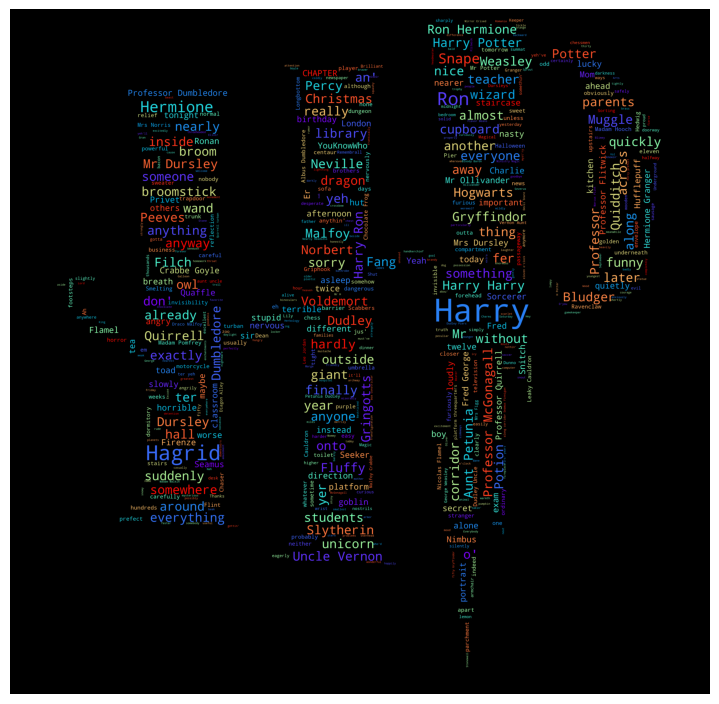

<Figure size 640x480 with 0 Axes>

In [ ]:

plt.figure(figsize = (7, 7), facecolor = None),
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
plt.savefig("img-harry-potter-and-the-chamber-of-secret-INVERT")